# Accuracy

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, x, y=None):
        pass
    
    # predic() 메소드는 단순히 Sex feature가 1 이면 0, 그렇지 않으면 1 로 예측함
    def predict(self, x):
        pred = np.zeros((x.shape[0], 1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        
        return pred

In [2]:
from sklearn.preprocessing import LabelEncoder

# NULL 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(f'Dummy Classifier의 정확도는: {accuracy_score(y_test, mypredictions):.4f}')

Dummy Classifier의 정확도는: 0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, x,y):
        pass
    
    # 입력값으로 들어오는 x데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)
    
# 사이킷런의 내장 데이터 셋인 load_digits()를 이요하여 MNIST 데이터로 로딩
digits = load_digits()

print(digits.data)
print(f'### digits.data.shape: {digits.data.shape}')
print(digits.target)
print(f'### digits.target.shape: {digits.target.shape}')

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [5]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 반환, 7번이 아니면 False이고 0으로 반환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
# 불균형한 레이블 데이터 분포도 확인
print(f'레이블 테스트 세트 크기: {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는: {accuracy_score(y_test, fakepred):.3f}')

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


# ConfusionMatrix

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision)과 재현율(Recall)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'정밀도: {precision_score(y_test, fakepred)}')
print(f'재현율: {recall_score(y_test, fakepred)}')

정밀도: 0.0
재현율: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/ 테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Precision/Recall Trade-off

## predict_proba() 메소드 확인

In [11]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba()결과 Shape: {pred_proba.shape}')
print(f'\npred_proba array에서 앞 3개만 샘플로 추출 \n: {pred_proba[:3]}')

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(f'\n두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n: {pred_proba_result[:3]}')

pred_proba()결과 Shape: (179, 2)

pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
: [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


## Binarizer 활용

In [12]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

# threshold 기준값보다 같거나 작으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


## 분류 결정 임계값 0.5기반에서 Binarizer를 이용하여 예측값 변환

In [13]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [14]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정 값, 분류 결정 임계값
custom_threshold = 0.4

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [15]:
thresholds = [0.4, 0.45, 0.5 ,0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_treshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print(f'임계값: {custom_treshold}')
        get_clf_eval(y_test, custom_predict)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.45
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.5
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.55
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.6
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [27]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(f'반환된 분류 결정 입계값 배열의 Shape: {thresholds.shape}')
print(f'반환된 precisions 배열의 Shape: {precisions.shape}')
print(f'반환된 recalls 배열의 Shape: {recalls.shape}')

print(f'\nthresholds 5 sample: {thresholds[:5]}')
print(f'precisions 5 sample: {precisions[:5]}')
print(f'nrecalls 5 sample: {recalls[:5]}')

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print(f'\n샘플 추출을 위한 임계값 배열의 index 10개: {thr_index}')
print(f'샘플용 10개의 임계값: {np.round(thresholds[thr_index], 2)}')

# 15 Step 단위로 추출된 임게값에 따른 정밀도와 재현율 값
print(f'\n샘플 임게값별 정밀도: {np.round(precisions[thr_index], 3)}')
print(f'샘플 임게값별 재현율: {np.round(recalls[thr_index], 3)}')

반환된 분류 결정 입계값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)

thresholds 5 sample: [0.10393302 0.10393523 0.10395998 0.10735757 0.10891579]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
nrecalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]

샘플 임게값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임게값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


## 임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

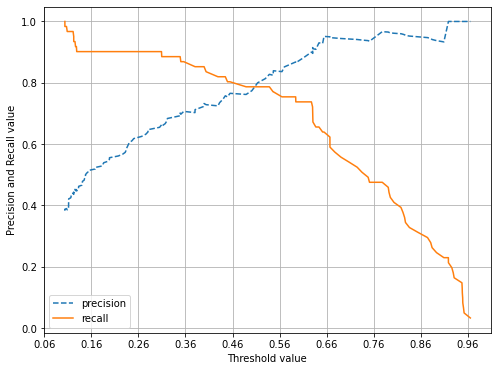

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로 y축은 정밀도, 재현울 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [34]:
thresholds.shape[0]
precisions.shape[0]
recalls.shape[0]

144